# Preliminary Dataset Visualizations
Before I decided to use the GeRS-DeMo's results with my EROI calculations, I wanted to understand the peculiarities of the fossil fuel reserve datasets that the model required. These are:
 - Dynamic_Low - Mohr's estimates from literature by Laherrere, Campbell, and Rutledge.
  - Dynamic_High - High estimates from the World Energy Council (collected by Mohr).
  - Dynamic_BG - Best estimation between High and Low by Mohr.

(An explanation in the thesis for these differences can also be found in Sec. 4.2).

These datasets were for Mohr's INDEPENDENTLY DYNAMIC calculation, which allowed total demand and total production to interact and attempt to equalize for each fuel source individually. There was also DYNAMIC, which had similar interactions as INDEPENDENTLY DYNAMIC but for all resources total demand and production being compared (the dynamic datasets could also be used for this); and STATIC, which did not have any interaction between total demand and production.

See Mohr's thesis abstract for a better explanation, as for some reason I didn't include one in my thesis :(.

#### Imports
Mines and fields were considered and modeled separately by Mohr and the dataset reflects that. I am importing them below in order to create a total summary of all production during this analysis.

In [1]:
import pandas as pd
import seaborn as sns
sns.reset_orig()
import matplotlib.pyplot as plt

## Importing Global Development Data
base_dynamic = pd.ExcelFile("datasets/Dynamic_BG.xlsm")
high_dynamic = pd.ExcelFile("datasets/Dynamic_high.xlsm")
low_dynamic = pd.ExcelFile("datasets/Dynamic_low.xlsm")

base_mines = pd.read_excel(base_dynamic, "Mine")
base_fields = pd.read_excel(base_dynamic, "Field")
high_mines = pd.read_excel(high_dynamic, "Mine")
high_fields = pd.read_excel(high_dynamic, "Field")
low_mines = pd.read_excel(low_dynamic, "Mine")
low_fields = pd.read_excel(low_dynamic, "Field")

#### Processing Data
Certain information was gathered from the dataset before visualization into dataframes, which are explained below:
- urr_mines - Organized by continent/mineral/year/URR for mine deposits.
- urr_fields - Organized by continent/mineral/year/URR for field deposits.
- urr_all - A combination of urr_mines and urr_fields by continent/mineral/URR (year dropped).
- prod_year - Production of all resources on a per year basis.
- prod_decade - Production of all resources on a per decade basis.
- urr_all_country - The
        'urr_mines': urr_mines,
        'urr_fields': urr_fields,
        'urr_all': urr_all,
        'prod_year': prod_year,
        'prod_decade': prod_decade,
        'urr_all_country': urr_all_country,
        'total_urr': total_urr

In [8]:
def process_scenario(mines_df, fields_df, rename_continents=True):
    """
    Process URR data for a scenario (base, high, or low).

    :param mines_df: DataFrame containing mines data.
    :param fields_df: DataFrame containing fields data.
    :param rename_continents: Whether to rename continents for readability.
    :return: Dictionary containing processed DataFrames.
    """
    # Continent/Mineral/Year/URR
    urr_mines = mines_df.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
    urr_fields = fields_df.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})

    # Continent/Mineral/URR
    urr_all = pd.concat([urr_mines, urr_fields]).groupby(['Continent', 'Mineral'], as_index=False).agg({'URR': 'sum'})

    if rename_continents:
        urr_all['Continent'] = urr_all['Continent'].replace({
            'FSU': 'Former Soviet Union',
            'North_America': 'North America',
            'South_America': 'Latin America',
            'Middle_East': 'Middle East'
        })

    # Year/Prod and Decade/Prod
    prod_year = pd.concat([urr_mines, urr_fields]).groupby(['Start Year'], as_index=False).agg({'URR': 'sum'})
    prod_year['Decade'] = (prod_year['Start Year'] // 10) * 10
    prod_decade = prod_year.groupby('Decade', as_index=False).agg({'URR': 'sum'})

    # Country/Mineral/URR
    urr_mines_country = mines_df.groupby(['Country', 'Mineral'], as_index=False).agg({'URR': 'sum'})
    urr_fields_country = fields_df.groupby(['Country', 'Mineral'], as_index=False).agg({'URR': 'sum'})
    urr_all_country = pd.concat([urr_mines_country, urr_fields_country]).groupby(['Country', 'Mineral'], as_index=False).agg({'URR': 'sum'})
    urr_all_country = urr_all_country.sort_values(by="URR", ascending=False)

    # Total URR
    total_urr = mines_df['URR'].sum() + fields_df['URR'].sum()

    return {
        'urr_mines': urr_mines,
        'urr_fields': urr_fields,
        'urr_all': urr_all,
        'prod_year': prod_year,
        'prod_decade': prod_decade,
        'urr_all_country': urr_all_country,
        'total_urr': total_urr
    }

## Processing Scenarios
base_scenario = process_scenario(base_mines, base_fields)
high_scenario = process_scenario(high_mines, high_fields)
low_scenario = process_scenario(low_mines, low_fields)

# Displaying Scenarios for Testing
display(base_scenario['urr_all'])
display(base_scenario['prod_decade'])
display(base_scenario['urr_all_country'])

## Determining Total URRs
print(f"Total Global High URR: {high_scenario['total_urr']:.0f} EJ")
print(f"Total Global Base URR: {base_scenario['total_urr']:.0f} EJ")
print(f"Total Global Low URR: {low_scenario['total_urr']:.0f} EJ")

# To select a specific mineral type (commented code in original)
# filtered_country = base_scenario['urr_all_country'][base_scenario['urr_all_country']["Mineral"]=="Gas"]

,Continent,Mineral,URR
0,Africa,Coal,988.175662
1,Africa,Gas,3713.247000
2,Africa,Oil,2044.082000
3,Asia,Coal,12353.461979
4,Asia,Gas,4994.670476
5,Asia,Oil,2094.495300
6,Europe,Coal,2675.132990
7,Europe,Gas,1481.981300
8,Europe,Oil,665.916170
9,Former Soviet Union,Coal,1668.800000


,Decade,URR
0,1710,554.900000
1,1750,105.700000
2,1770,105.400000
3,1780,16.000000
4,1790,153.010000
5,1800,381.800000
6,1810,655.200000
7,1830,151.450000
8,1840,105.900000
9,1850,1626.699000


,Country,Mineral,URR
305,USA,Oil,5213.672763
65,China,Coal,4958.365000
14,Australia,Coal,4566.763100
303,USA,Coal,4190.722930
100,FSU,Gas,4102.672000
...,...,...,...
202,New_Caledonia,Coal,0.002400
173,Madagascar,Coal,0.001160
53,Cameroon,Coal,0.000380
168,Lebanon,Coal,0.000160


Total Global High URR: 121488 EJ
Total Global Base URR: 75676 EJ
Total Global Low URR: 48409 EJ


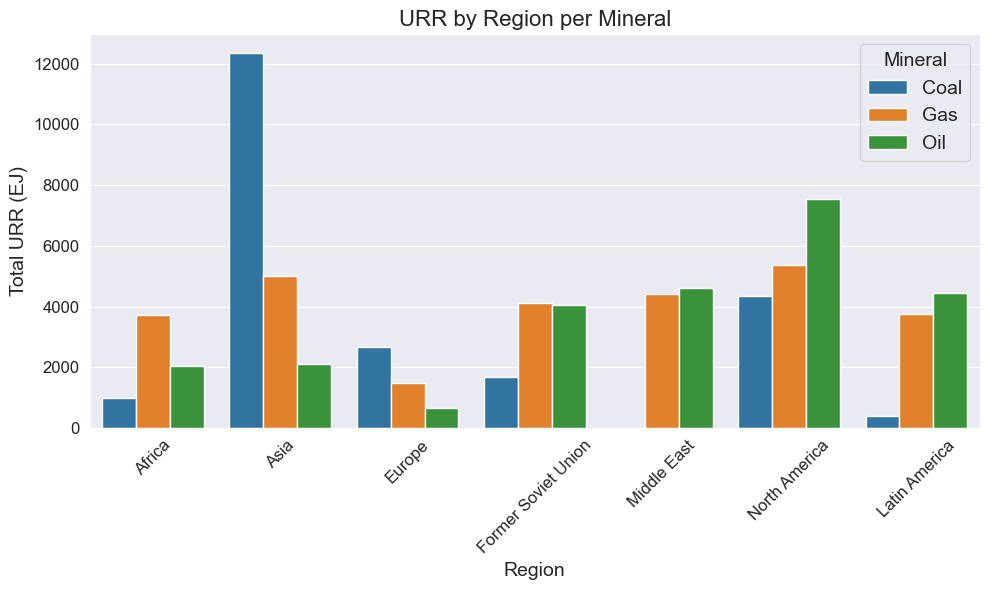

In [6]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=base_scenario["urr_all"], x='Continent', y='URR', hue='Mineral')

# Customize the plot
plt.title('URR by Region per Mineral', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total URR (EJ)', fontsize=14)
plt.legend(title='Mineral', fontsize=14, title_fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('Outputs/URRRegionMineral.png')

# Show the plot
plt.show()


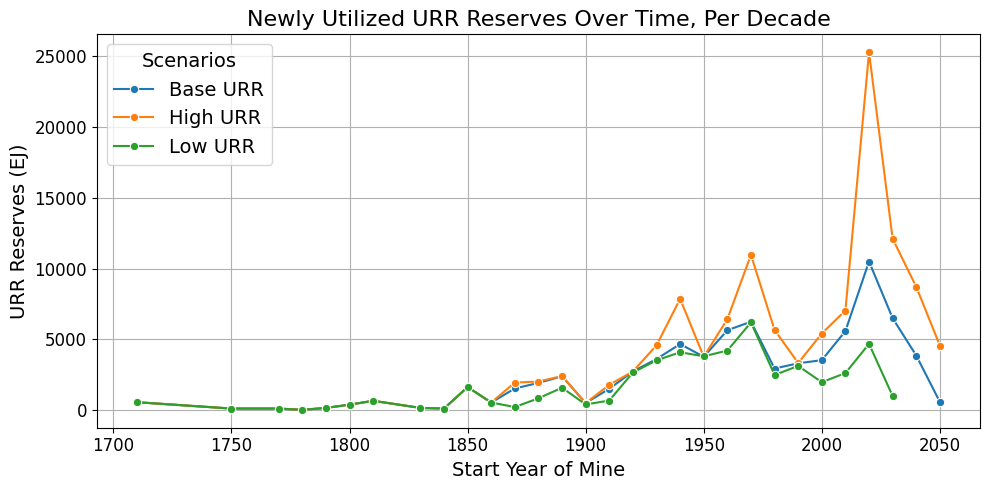

In [24]:
# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=base_scenario["prod_decade"], x='Decade', y='URR', marker='o', label='Base URR')
sns.lineplot(data=high_scenario["prod_decade"], x='Decade', y='URR', marker='o', label='High URR')
sns.lineplot(data=low_scenario["prod_decade"], x='Decade', y='URR', marker='o', label='Low URR')


# Customize the plot
plt.title('Newly Utilized URR Reserves Over Time, Per Decade', fontsize=16)
plt.xlabel('Start Year of Mine', fontsize=14)
plt.ylabel('URR Reserves (EJ)', fontsize=14)
plt.legend(title='Scenarios', fontsize=14, title_fontsize=14, loc="upper left")  # Add legend with a title
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()

plt.savefig('Outputs/URRReservesOverTimePerDecade.png')

# Show the plot
plt.show()

